In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load your dataset (replace 'dataset.csv' with your actual dataset file)
data = pd.read_csv(r'C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv')

# Remove the 'Customer Number' variable
data.drop(columns=['Customer Number'], inplace=True)

# Convert data to transactional format
transactions = data.applymap(lambda x: 1 if x == 1 else 0)

# Generate frequent itemsets using the Apriori algorithm
# Lower the min_support value
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Print the association rules
print(rules)



C:\Users\siddh\AppData\Local\Temp\ipykernel_14900\3599840130.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.applymap(lambda x: 1 if x == 1 else 0)


                                          antecedents  \
0                               (Housewares Division)   
1                               (Automotive Division)   
2                     (Personal Electronics Division)   
3                                   (Garden Division)   
4                             (Novelty Gift Division)   
5                                  (Jewelry Division)   
6                             (Novelty Gift Division)   
7   (Housewares Division, Personal Electronics Div...   
8              (Housewares Division, Garden Division)   
9        (Housewares Division, Novelty Gift Division)   
10            (Jewelry Division, Housewares Division)   
11   (Personal Electronics Division, Garden Division)   
12  (Novelty Gift Division, Health Products Division)   
13  (Novelty Gift Division, Personal Electronics D...   
14                            (Novelty Gift Division)   
15  (Jewelry Division, Personal Electronics Division)   
16                (Jewelry Divi

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


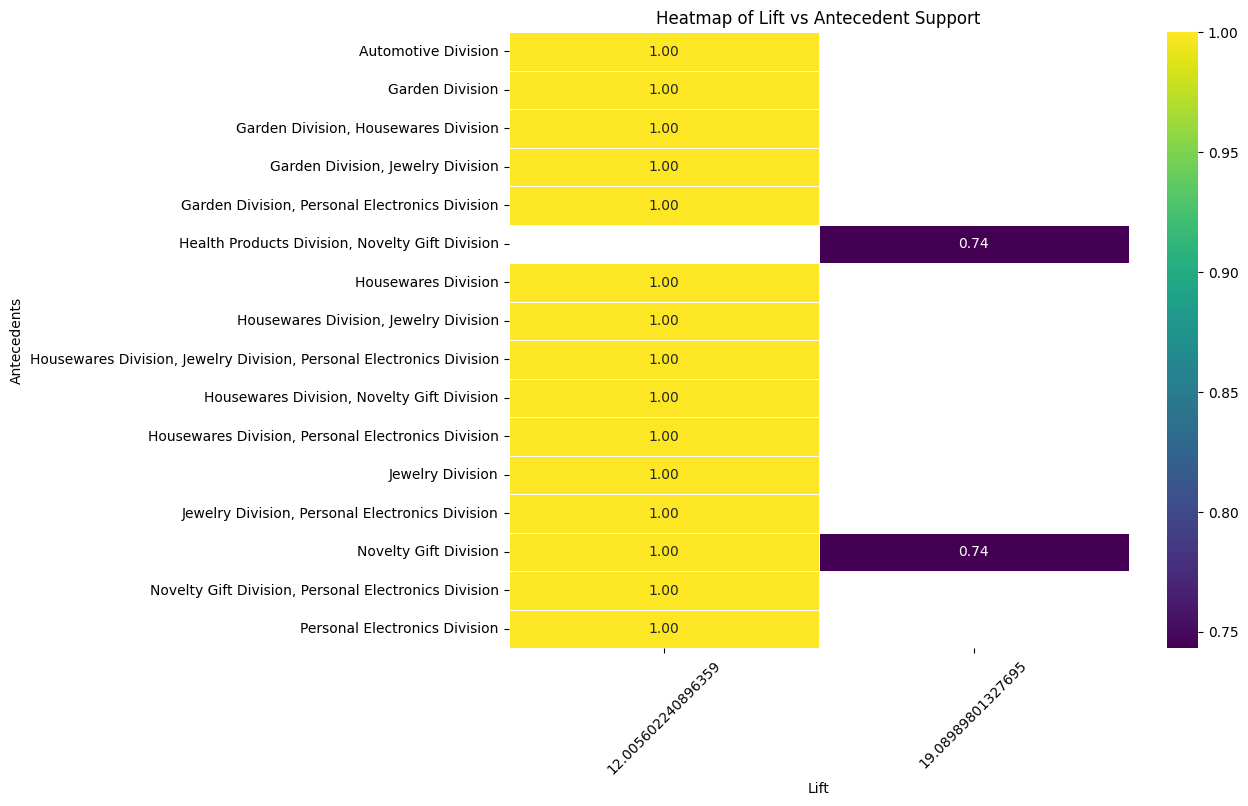

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules with columns 'antecedents', 'lift', and 'antecedent support'

# Extract antecedent names
antecedents = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x))))  # Sort to ensure uniqueness

# Reset index
rules.reset_index(drop=True, inplace=True)

# Set antecedents as a new column
rules['antecedent_names'] = antecedents

# Pivot the data
heatmap_data = rules.pivot_table(index='antecedent_names', columns='lift', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Lift vs Antecedent Support')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


With this we can understand the confidence level for each antecedent and how it correlates to the consequent. with this it is safe to say that Personal electronics div rarely supports the purchase of novelty gifts div or vice versa. 

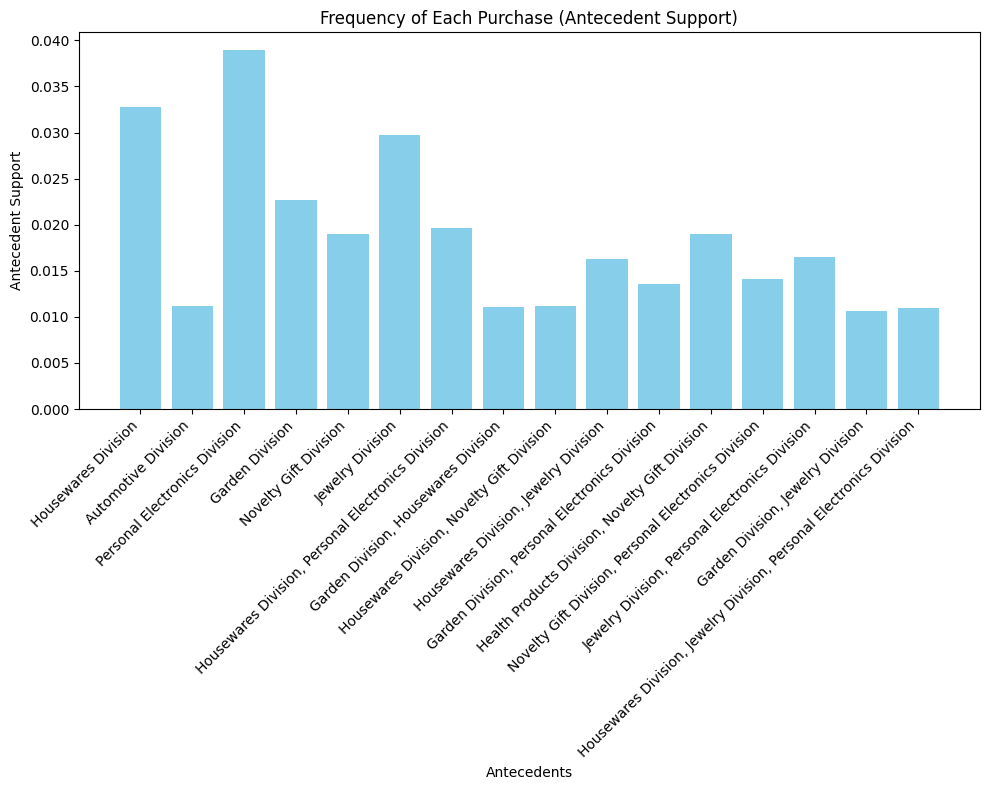

In [18]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules with columns 'antecedents' and 'antecedent support'

# Extract antecedent names and support
antecedents = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x))))
antecedent_support = rules['antecedent support']

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.bar(antecedents, antecedent_support, color='skyblue')
plt.xlabel('Antecedents')
plt.ylabel('Antecedent Support')
plt.title('Frequency of Each Purchase (Antecedent Support)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now we know how many times each catalogue has been purchased. 

C:\Users\siddh\AppData\Local\Temp\ipykernel_14900\3938942381.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rules, x=rules.index, y='zhangs_metric', palette='viridis')
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is depr

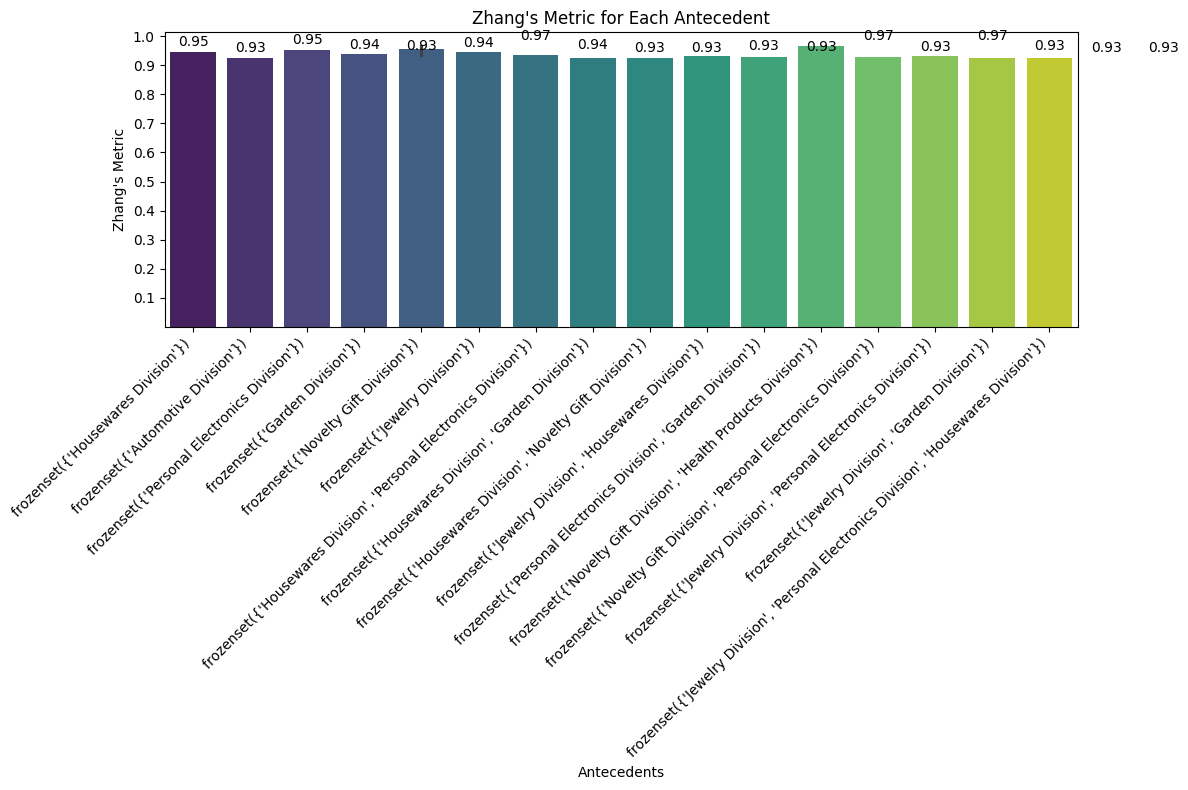

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rules' is your DataFrame containing association rules with columns 'antecedents' and 'zhangs_metric'

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=rules, x=rules.index, y='zhangs_metric', palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels diagonally
plt.xlabel('Antecedents')
plt.ylabel("Zhang's Metric")
plt.title("Zhang's Metric for Each Antecedent")
plt.yticks(np.arange(0.1, 1.1, 0.1))  # Set y-axis ticks from 0.1 to 1.0 with a step of 0.1

# Annotate each bar with its value
for index, value in enumerate(rules['zhangs_metric']):
    plt.text(index, value + 0.01, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [42]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
file_path = r'C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv'
data = pd.read_csv(file_path)

# Each row represents a user, and each column represents a catalog
# We'll encode the binary purchase data: 1 for purchased, 0 for not purchased
data = data.drop(columns=['Customer Number'])  # Drop Customer Number column
num_users = len(data)
num_catalogs = len(data.columns)

# Step 2: Data Preprocessing
# Convert binary purchase data to float32
data = data.astype('float32')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Define Model
# Define your collaborative filtering model here
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[num_catalogs]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_catalogs)
])

# Step 4: Compile the Model
# Compile your model here
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 5: Train the Model
# Train your model here
history = model.fit(train_data, train_data, epochs=10, validation_split=0.2)

# Step 6: Generate Recommendations
# Generate recommendations using your trained model


C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan


In [44]:
# Step 6: Generate Recommendations
# Generate recommendations using your trained model

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to DataFrame for easier manipulation
predictions_df = pd.DataFrame(predictions, columns=data.columns)

# Get the top N recommendations for each user
# For example, get the top 3 recommendations
top_n_recommendations = {}
for user_id, user_predictions in predictions_df.iterrows():
    top_n_recommendations[user_id] = user_predictions.nlargest(3).index.tolist()

# Now, top_n_recommendations dictionary contains the top N recommendations for each user
# You can use this information to make personalized recommendations to users

# Print out recommendations for each user
for user_id, recommendations in top_n_recommendations.items():
    print(f"User {user_id} Recommendations: {recommendations}")


376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
User 0 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 1 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 2 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 3 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 4 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 5 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 6 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 7 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 8 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products Division']
User 9 Recommendations: ['Clothing Division', 'Housewares Division', 'Health Products 

In [49]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Step 1: Load the Dataset
data = pd.read_csv(r'C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv')

# Step 2: Data Preprocessing
# Convert binary purchase data to boolean
data = data.astype(bool)

# Step 3: Generate Frequent Itemsets
frequent_itemsets = fpgrowth(data, min_support=0.01, use_colnames=True)

# Step 4: Generate Association Rules
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Generate Recommendations
def generate_recommendations(customer_number, association_rules, user_history, top_n=3):
    relevant_rules = []
    
    # Find relevant rules for the customer
    for _, row in association_rules.iterrows():
        antecedents = set(row['antecedents'])
        consequents = set(row['consequents'])
        if antecedents.issubset(user_history):
            relevant_rules.append(row)
    
    # Rank relevant rules based on lift or confidence
    relevant_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
    
    recommendations = []
    # Generate recommendations from top rules
    for _, rule in relevant_rules.iterrows():
        consequents = rule['consequents']
        for item in consequents:
            if item not in user_history:
                recommendations.append(item)
                if len(recommendations) >= top_n:
                    break
        if len(recommendations) >= top_n:
            break
    
    return recommendations

# Example usage
customer_number = 11956
user_history = {'Clothing Division', 'Housewares Division'}  # Example user history
top_n = 3
recommendations = generate_recommendations(customer_number, association_rules, user_history, top_n)
print(f"Recommendations for Customer {customer_number}: {recommendations}")


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv")  # Replace "CatalogCrossSell.csv" with the actual file path

# Group by Customer Number and count the number of purchases
purchase_frequency = data.drop(columns=['Customer Number']).sum()

# Display the results
print(purchase_frequency)



Clothing Division                 165.0
Housewares Division              1967.0
Health Products Division         4998.0
Automotive Division               674.0
Personal Electronics Division    2336.0
Computers Division                234.0
Garden Division                  1360.0
Novelty Gift Division            1137.0
Jewelry Division                 1784.0
Unnamed: 10                         0.0
Unnamed: 11                         0.0
Unnamed: 12                         0.0
Unnamed: 13                         0.0
Unnamed: 14                         0.0
Unnamed: 15                         0.0
Unnamed: 16                         0.0
Unnamed: 17                         0.0
Unnamed: 18                         0.0
Unnamed: 19                         0.0
dtype: float64


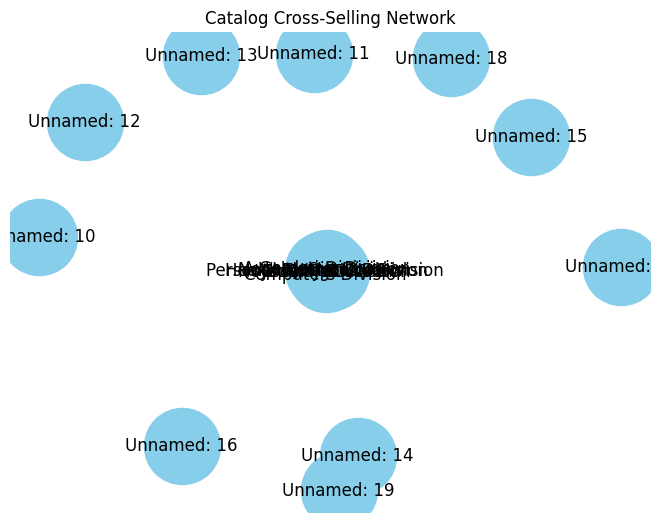

Node Degree Centrality:
Clothing Division: 0.4444444444444444
Housewares Division: 0.4444444444444444
Health Products Division: 0.4444444444444444
Automotive Division: 0.4444444444444444
Personal Electronics Division: 0.4444444444444444
Computers Division: 0.4444444444444444
Garden Division: 0.4444444444444444
Novelty Gift Division: 0.4444444444444444
Jewelry Division: 0.4444444444444444
Unnamed: 10: 0.0
Unnamed: 11: 0.0
Unnamed: 12: 0.0
Unnamed: 13: 0.0
Unnamed: 14: 0.0
Unnamed: 15: 0.0
Unnamed: 16: 0.0
Unnamed: 17: 0.0
Unnamed: 18: 0.0
Unnamed: 19: 0.0

Average Clustering Coefficient: 0.47368421052631576


In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv") 
  # Replace "your_dataset.csv" with the actual file path

# Create a graph
G = nx.Graph()

# Add nodes (catalogs) to the graph
catalogs = data.columns[1:]  # Exclude the first column (Customer Number)
G.add_nodes_from(catalogs)

# Add edges between catalogs based on co-purchases
for col1 in catalogs:
    for col2 in catalogs:
        if col1 != col2:
            co_purchases = data[(data[col1] == 1) & (data[col2] == 1)]
            weight = len(co_purchases)
            if weight > 0:
                G.add_edge(col1, col2, weight=weight)

# Calculate node degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Visualize the network
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue')
plt.title("Catalog Cross-Selling Network")
plt.show()

# Output centrality measures and clustering coefficient
print("Node Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality}")

print(f"\nAverage Clustering Coefficient: {clustering_coefficient}")


In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv")

# Group by 'Customer Number' and sum the total purchases for each customer
total_purchases = data.drop(columns=['Customer Number']).sum(axis=1)

# Calculate average purchase value per customer
avg_purchase_value = total_purchases.mean()

# Calculate total number of purchases across all customers
total_num_purchases = total_purchases.sum()

# Calculate average purchase frequency per customer
num_customers = 4999  # total number of customers in the dataset
avg_purchase_frequency = total_num_purchases / num_customers

# Assuming a customer's average lifespan with the company is 5 years
# Calculate CLV for each customer
customer_lifespan = 5  # in years
clv_per_customer = avg_purchase_value * avg_purchase_frequency * customer_lifespan

print("Average Customer Lifetime Value (CLV):", clv_per_customer)


Average Customer Lifetime Value (CLV): 3.579961125882933


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the Dataset
data = pd.read_csv(r'C:\Users\siddh\Downloads\CatalogCrossSell3 (1).csv', skiprows=1)

# Step 2: Data Preprocessing
# Replace NaN values with 0
data.fillna(0, inplace=True)

# Convert binary purchase data to float32
data = data.astype('float32')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Calculate Similarity Matrix
similarity_matrix = cosine_similarity(train_data)

# Step 4: Generate Recommendations
def generate_recommendations(user_id, train_data, similarity_matrix, top_n=3):
    # Get user vector
    user_vector = train_data.loc[user_id].values.reshape(1, -1)
    
    # Calculate similarity scores between user and other users
    user_similarities = similarity_matrix[user_id]
    
    # Sort similar users by similarity score
    similar_users_indices = user_similarities.argsort()[::-1][1:]  # Exclude the user itself
    
    # Generate recommendations based on similar users' purchase history
    recommendations = []
    for similar_user_index in similar_users_indices:
        similar_user_vector = train_data.iloc[similar_user_index].values.reshape(1, -1)
        recommendation_score = cosine_similarity(user_vector, similar_user_vector)[0][0]
        recommendations.append((similar_user_index, recommendation_score))
    
    # Sort recommendations by recommendation score
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    # Get top N recommendations
    top_recommendations = recommendations[:top_n]
    
    return top_recommendations

# Example: Generate recommendations for User 0
user_id = 0
top_n = 3
recommendations = generate_recommendations(user_id, train_data, similarity_matrix, top_n)
print(f"Recommendations for User {user_id}:")
for recommendation in recommendations:
    similar_user_index, recommendation_score = recommendation
    print(f"Similar User: {similar_user_index}, Recommendation Score: {recommendation_score}")


Recommendations for User 0:
Similar User: 15993, Recommendation Score: 1.0
Similar User: 15987, Recommendation Score: 1.0
Similar User: 16012, Recommendation Score: 1.0
